# Итоговая работа, математика

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1    

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).


In [6]:
def cosine( a, b ):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [7]:
for i in range(10):
    a = raitings[i]
    cosinuses = []
    for j in range(10):
        if i != j:
            cosinuses.append(cosine(a,raitings[j]))
    print(i+1,'pair:')
    print(a)
    print(raitings[cosinuses.index(max(cosinuses))])

1 pair:
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
2 pair:
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
3 pair:
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
4 pair:
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
5 pair:
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
6 pair:
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
7 pair:
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
8 pair:
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
9 pair:
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
10 pair:
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(raitings)
svd.transform(raitings)
print(svd.transform(raitings))

[[23.41982063 -5.36092136  3.83196779 -4.06950174  1.10267269]
 [24.76774917  4.52188701  1.35815965  1.58128545  8.59912002]
 [22.27728589 -6.96492049 -4.84461485 -0.47661647  3.37152266]
 [19.4257757   2.64575227 -6.86014009 -4.76604765  1.96075707]
 [22.8146354   0.51464093  7.70180188  4.42379773  1.29124163]
 [21.76961656  1.94294987 -4.56934779  8.32306487 -2.21887359]
 [21.23427453  9.78047778  1.16340271 -4.86074521 -2.60815471]
 [19.97476815  4.00048677 -1.67456316  1.1512346  -3.5637169 ]
 [26.39306998 -3.03090482  5.86422753 -1.67503491 -3.71500141]
 [29.94016844 -4.82012297 -3.48912415  0.05527083 -3.62526487]]


### Задание 2      
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [11]:
from scipy.misc import derivative
from sympy import *
import numpy as np

In [14]:
x = symbols('x')

def f(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2

print(derivative(f, 1.0, dx=1e-6, n=1))


55.3859176464222


In [15]:
a = 2*(-2*np.sin(2*1 + 3) + np.cos(1))*(np.tan(np.sin(1) + np.cos(2*1 + 3))**2 + 1)*np.tan(np.sin(1) + np.cos(2*1 + 3))
print(a)

55.385917635337854


### Задание 3   
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. 
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [16]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x


In [17]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])


In [18]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])


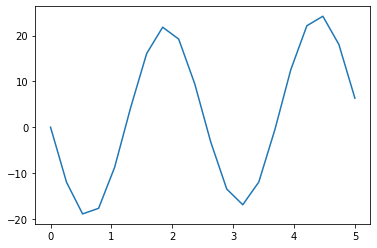

In [19]:
plt.plot(x, fx)
plt.show()

In [20]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))


In [21]:
starting_values = [0,0]
res = minimize(error, starting_values, method='COBYLA')
print(res)

     fun: 0.0767456611156554
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])


In [22]:
f(x, 3.00018796, -2.50008926)

array([  0.        , -12.02087275, -18.91357793, -17.69078403,
        -8.7531066 ,   4.27813496,  16.07269773,  21.81660902,
        19.22183973,   9.48147808,  -3.22834498, -13.49184736,
       -16.91450456, -11.95761308,  -0.58064785,  12.57675129,
        22.13167493,  24.20512418,  18.04136366,   6.32341507])

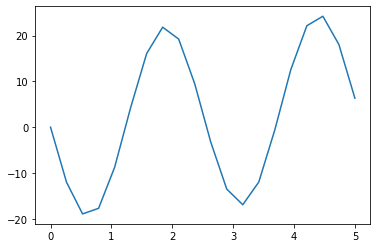

In [23]:
plt.plot(x, f(x, 3.00018796, -2.50008926))
plt.show()

### Задание 4     
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.



In [24]:
discr = np.random.randint(15, 70, size = 20)
print(discr)

[50 63 23 46 60 41 63 21 69 18 56 50 19 58 37 39 41 63 55 68]


In [25]:
means = []
for i in range(1000):
    rand = np.random.choice(discr, size=50)
    means.append(np.mean(rand))
print(means)

[46.46, 49.66, 49.62, 47.02, 49.34, 48.9, 45.42, 49.96, 45.06, 48.24, 49.74, 48.82, 46.44, 45.54, 49.16, 41.38, 49.36, 48.92, 42.8, 44.06, 42.56, 46.98, 44.52, 47.86, 42.7, 46.64, 48.96, 48.24, 45.38, 47.7, 49.46, 47.62, 45.42, 46.66, 50.2, 45.96, 46.14, 47.68, 45.48, 49.16, 46.74, 44.24, 49.86, 42.64, 47.44, 42.92, 47.76, 50.12, 52.9, 48.98, 45.06, 47.88, 47.28, 44.24, 46.46, 46.48, 46.2, 45.56, 43.04, 48.4, 46.02, 46.54, 47.44, 49.32, 43.74, 51.04, 50.6, 46.28, 45.4, 51.08, 50.44, 44.58, 48.6, 48.88, 43.6, 43.84, 47.58, 45.56, 48.92, 46.9, 48.54, 46.42, 48.96, 51.3, 49.94, 46.6, 49.22, 50.86, 46.96, 48.54, 46.44, 44.48, 52.18, 49.34, 41.84, 47.12, 45.82, 49.52, 44.22, 46.6, 47.36, 45.72, 48.74, 44.52, 49.0, 46.3, 50.02, 46.52, 43.42, 48.3, 45.68, 47.18, 46.16, 46.54, 45.54, 44.04, 46.46, 45.98, 44.24, 45.62, 44.16, 46.0, 43.62, 43.12, 48.68, 46.32, 46.8, 46.18, 47.92, 49.26, 49.64, 47.94, 48.06, 44.78, 49.8, 47.86, 47.52, 50.4, 47.66, 46.84, 46.48, 38.88, 50.26, 47.62, 47.22, 45.36, 

<function matplotlib.pyplot.show(close=None, block=None)>

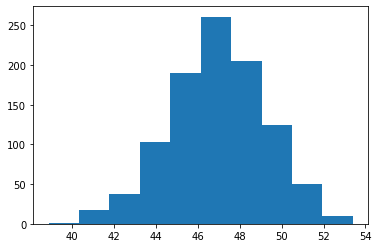

In [26]:
plt.hist(means)
plt.show

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):


In [29]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [55]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[ 3. -1.]

Eigenvectors:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Собственные значения:

|1-λ    4|    
|1    1-λ| = 0  =>

(1-	λ)*(1- λ)-4 = 0  =>

λ***2-2*λ-3 = 0

Корни уравнения: 3, -1

Собственные вектора находим из уравнений:

-2x + 4y = 0          
x - 2y = 0


2x + 4y = 0      
x + 2y = 0

Вариант решения:         
1, 0.5

-1, 0.5